In [54]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

### Data preprocessing

In [55]:
# Load the dataset
data = pd.read_csv('Data\\features_30_sec.csv')
# Show data frame first few rows
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


10 output classes, and 60 -2 = 58 input features.

In [56]:
print(data['label'].nunique())

10


In [57]:
len(data.columns)

60

In [58]:
data[data['length']!=661794]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
142,classical.00042.wav,669680,0.261831,0.083939,0.134171,0.002705,1326.203440,35780.405574,1326.462426,33984.207800,...,50.200699,-6.087149,53.039547,-1.028055,72.066505,-4.122477,52.484566,-1.506043,103.919960,classical
143,classical.00043.wav,661676,0.191017,0.081891,0.115342,0.002917,1063.074682,119707.829471,1552.266186,164231.650458,...,98.570480,-3.974726,112.012848,-0.890092,119.475166,-3.994061,95.882133,-3.890932,77.708138,classical
145,classical.00045.wav,665280,0.236149,0.083982,0.138355,0.001745,1176.477463,25044.206237,1504.127893,31109.799812,...,46.034290,-3.882558,51.164158,0.291803,93.177521,-3.436379,123.323029,-0.922374,102.748123,classical
146,classical.00046.wav,661760,0.346803,0.078617,0.115099,0.000357,1878.382005,85699.962726,1964.688409,53244.699258,...,29.995607,-3.394369,35.613697,1.692993,24.515646,-3.680548,66.970215,-3.433261,59.929924,classical
148,classical.00048.wav,663520,0.296374,0.081929,0.160857,0.003166,1513.870637,548932.624754,1640.492674,267135.469308,...,57.928230,-4.695436,46.060249,-2.247865,53.625267,-5.165849,55.770363,-3.224921,84.388130,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,rock.00027.wav,661500,0.402529,0.088676,0.079205,0.000248,2669.225602,459841.222070,2440.309176,85044.046601,...,43.705780,-5.988237,50.241512,-0.320170,72.722969,-2.339704,65.234520,-4.321177,50.373405,rock
932,rock.00032.wav,670340,0.383185,0.087024,0.221942,0.002420,2344.557640,274398.911078,2374.870288,99970.970817,...,53.140347,-5.952542,43.923519,-1.589456,46.816200,-6.753542,54.287895,-1.354669,54.202164,rock
934,rock.00034.wav,669460,0.421525,0.078821,0.191109,0.000777,2788.250576,281963.801424,2648.300009,82084.609959,...,31.985596,-3.950784,33.262257,-1.652625,38.082653,-6.456863,37.679344,-3.960848,65.180389,rock
936,rock.00036.wav,667920,0.427913,0.077137,0.216395,0.001451,2850.226846,406534.196995,2621.669424,116899.834324,...,33.792919,-6.156087,32.259113,1.021904,29.231730,-3.381267,34.280281,1.331612,49.572266,rock


In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1000.0,6.620308e+05,1.784074e+03,6.600000e+05,661504.000000,6.617940e+05,6.617940e+05,6.758080e+05
chroma_stft_mean,1000.0,3.786817e-01,8.170489e-02,1.719392e-01,0.319562,3.831479e-01,4.359417e-01,6.636847e-01
chroma_stft_var,1000.0,8.633982e-02,7.735298e-03,4.455525e-02,0.082298,8.661463e-02,9.125551e-02,1.081115e-01
rms_mean,1000.0,1.309297e-01,6.568311e-02,5.276444e-03,0.086657,1.224431e-01,1.756822e-01,3.979734e-01
rms_var,1000.0,3.051399e-03,3.634500e-03,4.294372e-06,0.000942,1.816440e-03,3.577055e-03,2.767948e-02
spectral_centroid_mean,1000.0,2.201781e+03,7.159606e+02,5.700404e+02,1627.697311,2.209263e+03,2.691295e+03,4.435244e+03
spectral_centroid_var,1000.0,4.696916e+05,4.008995e+05,7.911251e+03,184350.530174,3.384862e+05,6.121479e+05,3.036843e+06
spectral_bandwidth_mean,1000.0,2.242541e+03,5.263165e+02,8.980662e+02,1907.240605,2.221393e+03,2.578470e+03,3.509646e+03
spectral_bandwidth_var,1000.0,1.370792e+05,9.645567e+04,1.078719e+04,67376.554428,1.119775e+05,1.823716e+05,6.947848e+05
rolloff_mean,1000.0,4.571549e+03,1.574792e+03,7.491406e+02,3380.069642,4.658524e+03,5.533810e+03,8.677673e+03


The range of the features vary greatly such as the range of chroma_stft_mean is from 1.719392e-01 to 6.636847e-01. As i have mentioned about the outlier for each of feature, standardlization would be helpful to this issue as it can yields better performance with faster algorithm convergence and better optimisation results.

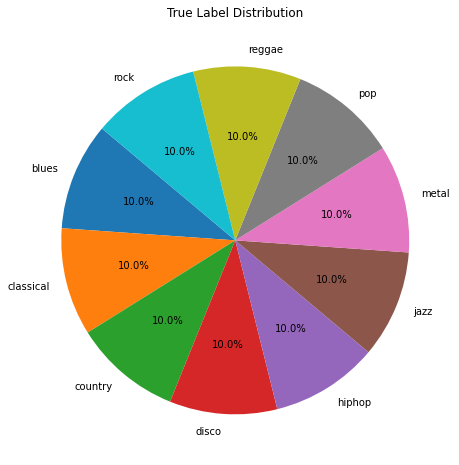

In [60]:
label_counts = Counter(data['label'])


plt.figure(figsize=(8, 8))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('True Label Distribution')
plt.show()

No data balanced issue

In [7]:
from PIL import Image
import torchvision
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [25]:
image_path = 'C:\\Users\\paddy\\DP\\Deep Learning Project\\Data\\images_original\\hiphop\\hiphop00006.png'
image = Image.open(image_path)
transform = transforms.ToTensor()
tensor_image = transform(image)

The image has 4 channels, and 432(width) * 288 (height) pixels

In [30]:
tensor_image.size()

torch.Size([4, 288, 432])

In [31]:
tensor_image

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 

Check the the pixel values of data

In [32]:
transform = transforms.ToTensor()
dataset = datasets.ImageFolder('Data\\images_original', transform=transform)

In [33]:
min_pixel_value = float('inf')
max_pixel_value = float('-inf')

In [34]:
for data, _ in dataset:
    current_min = torch.min(data).item()
    current_max = torch.max(data).item()

    # Update min and max values
    if current_min < min_pixel_value:
        min_pixel_value = current_min
    if current_max > max_pixel_value:
        max_pixel_value = current_max

print(f'Min pixel value: {min_pixel_value}')
print(f'Max pixel value: {max_pixel_value}')

Min pixel value: 0.0
Max pixel value: 1.0


### Data structure and model selection

Apart from the tabular data of csv file that can be used for training, since the each of audio file can also be converted to Mel spectrograms image so CNN can be used to classify image data since it learn spatial hierarchies of features by caputring low-level features like edge and colour in the early layer and more complex features like textures and patterns in deeper layers. 

For the tabular data from csv file, MLP can be suitable to use since its forward method and backward method with multiple layer and non-linear activation function applied can capture the complex and nonlinear relationship between features by interating epoch to reduce loss.

There are pretained model that can be fine-tuned for music classification
